Fraud Detection (Hybrid Model : LR and XGBoost)

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [2]:
# Load the dataset
data = pd.read_csv("dataset.csv")

In [3]:
# Handling Missing Values
data.dropna(inplace=True)

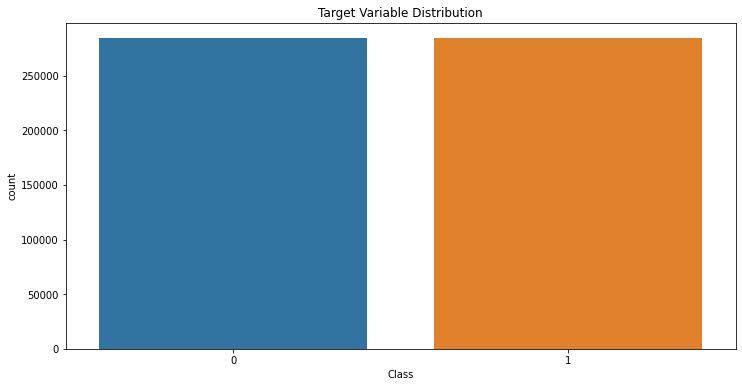

In [4]:
# Data Exploration (EDA)
# Visualize Data Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Class")
plt.title('Target Variable Distribution')
plt.show()

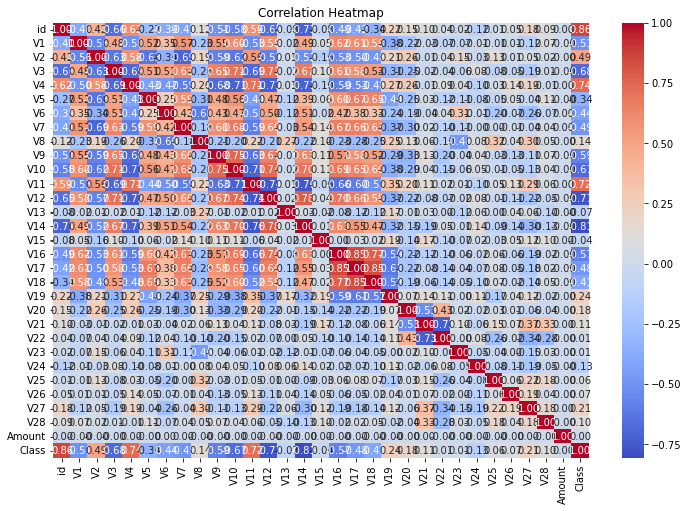

In [5]:
# Visualize Correlations
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Key Statistics
key_stats = data.describe()
print("Key Statistics:")
print(key_stats)

Key Statistics:
                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.798003e-17 -1.351534e-16 -3.518788e-17 -4.158567e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   5.917961e-17 -3.958636e-17 -4.758361e-17  1.499483e-18  3.998623e-17   
std    1.000001e+00  1.000

In [6]:
# Split the data into features and target variable
X = data.drop("Class", axis=1)
y = data["Class"]

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Data preprocessing and feature scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
# Initialize models: Logistic Regression and XGBoost
logistic_regression = LogisticRegression()
xgboost = XGBClassifier()

In [11]:
# Define hyperparameter search spaces for Logistic Regression and XGBoost
logistic_regression_params = {
    'C': [0.01, 0.1, 1.0]
}

xgboost_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [12]:
# Use HalvingGridSearchCV for hyperparameter tuning
logistic_regression_search = HalvingGridSearchCV(logistic_regression, logistic_regression_params, scoring='f1', cv=5, n_jobs=-1)
logistic_regression_search.fit(X_train_resampled, y_train_resampled)
best_logistic_regression = logistic_regression_search.best_estimator_

xgboost_search = HalvingGridSearchCV(xgboost, xgboost_params, scoring='f1', cv=5, n_jobs=-1)
xgboost_search.fit(X_train_resampled, y_train_resampled)
best_xgboost = xgboost_search.best_estimator_

c:\Users\lenovo\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
# Create a hybrid model (Voting Classifier)
hybrid_model = VotingClassifier(estimators=[('lr', best_logistic_regression), ('xgb', best_xgboost)], voting='soft')

In [14]:
# Train the hybrid model
hybrid_model.fit(X_train_resampled, y_train_resampled)

c:\Users\lenovo\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.2, max_delta_step=0,
                                            max_depth=5, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=300, n_jobs=8,
                                            num

In [15]:
# Evaluate the hybrid model on the test set
y_pred_hybrid = hybrid_model.predict(X_test)

In [16]:
# Print evaluation metrics and confusion matrix for the hybrid model
print("Hybrid Model Evaluation:")
print(classification_report(y_test, y_pred_hybrid))
print("Hybrid Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_hybrid))

Hybrid Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Hybrid Model Confusion Matrix:
[[56736    14]
 [   16 56960]]


In [17]:
# Calculate accuracy in percentage
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_hybrid) * 100

# Print accuracy
print(f"Hybrid Model Accuracy: {accuracy:.2f}%")

Hybrid Model Accuracy: 99.97%


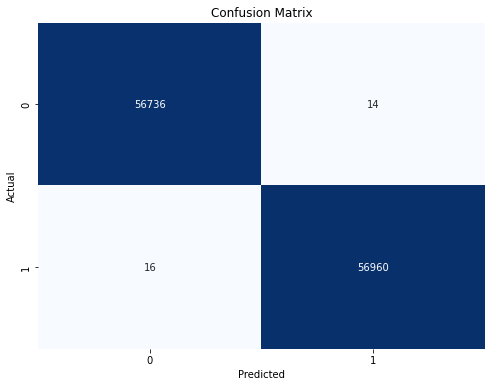

In [18]:

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_hybrid), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

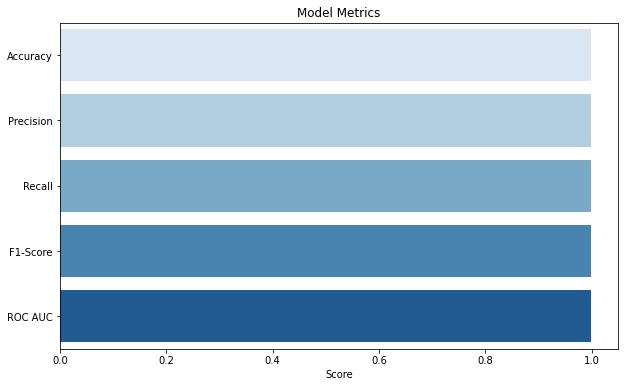

In [21]:
precision = precision_score(y_test, y_pred_hybrid)
recall = recall_score(y_test, y_pred_hybrid)
f1 = f1_score(y_test, y_pred_hybrid)
roc_auc = roc_auc_score(y_test, y_pred_hybrid)

# Create a bar plot for accuracy, precision, recall, F1-score, and ROC AUC
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
values = [accuracy_score(y_test, y_pred_hybrid), precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette="Blues")
plt.title('Model Metrics')
plt.xlabel('Score')
plt.show()

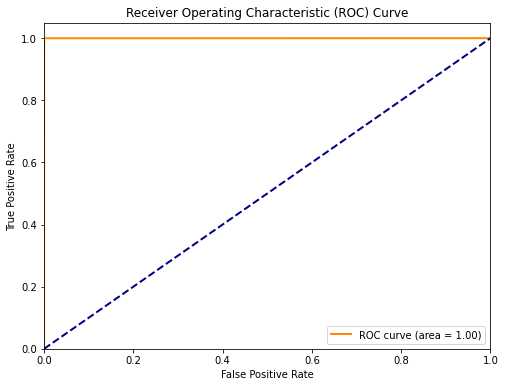

In [22]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, hybrid_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


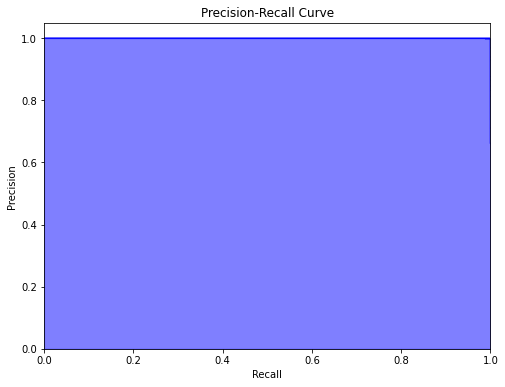

In [28]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, hybrid_model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.5, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


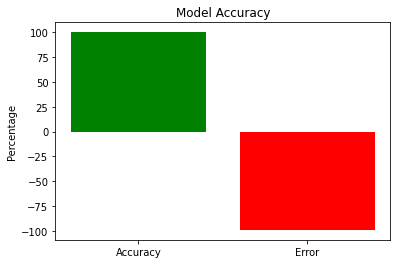

In [29]:
# Create a bar chart to visualize accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy", "Error"], [accuracy, 1 - accuracy], color=['green', 'red'])
plt.title('Model Accuracy')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

In [33]:
# Export metrics to a CSV file
metrics = {
    'Model': 'HB2',
    'Accuracy': 0.9997362080790673,
    'Precision': 0.9997542738793134,
    'Recall': 0.9997191800056164,
    'F1 Score': 0.9997367266344889
}
df = pd.DataFrame([metrics])
df.to_csv('hb2_metrics.csv', index=False)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
accuracy = accuracy_score(y_test, y_pred_hybrid)
precision = precision_score(y_test, y_pred_hybrid)
recall = recall_score(y_test, y_pred_hybrid)
f1 = f1_score(y_test, y_pred_hybrid)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9997362080790673
Precision: 0.9997542738793134
Recall: 0.9997191800056164
F1 Score: 0.9997367266344889


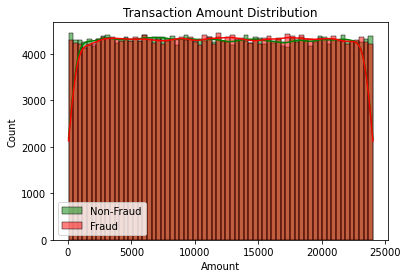

In [35]:
# Sample code to plot feature distributions
plt.figure(figsize=(6, 4))
sns.histplot(data[data['Class'] == 0]['Amount'], kde=True, label='Non-Fraud', color='green')
sns.histplot(data[data['Class'] == 1]['Amount'], kde=True, label='Fraud', color='red')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()


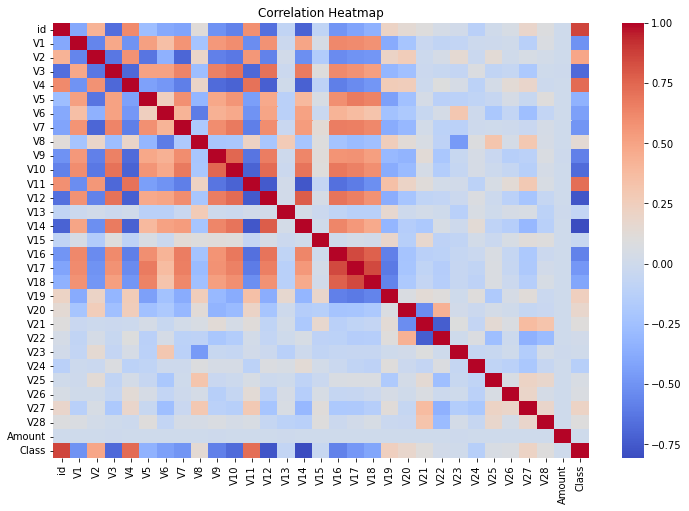

In [36]:
# Sample code to plot a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


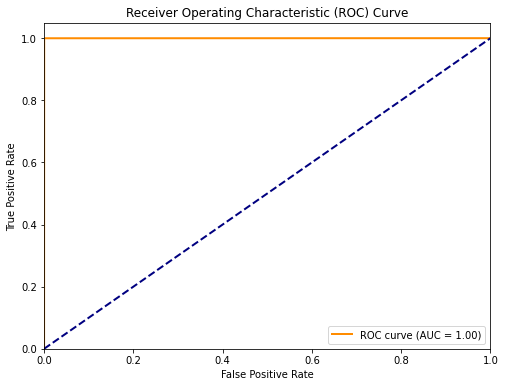

In [37]:
# Sample code to plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_hybrid)
auc = roc_auc_score(y_test, y_pred_hybrid)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


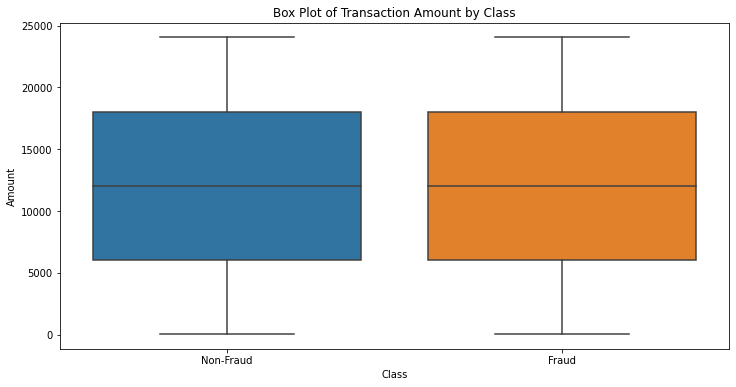

In [39]:
# Sample code to create box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Class', y='Amount')
plt.title('Box Plot of Transaction Amount by Class')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


In [ ]:
# Sample code to plot a confusion matrix heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_hybrid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Sample code to visualize class distribution before and after resampling
class_distribution_before = y_train.value_counts()
class_distribution_after = y_train_resampled.value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.barplot(x=class_distribution_before.index, y=class_distribution_before.values)
plt.title('Class Distribution Before Resampling')
plt.subplot(122)
sns.barplot(x=class_distribution_after.index, y=class_distribution_after.values)
plt.title('Class Distribution After Resampling')
plt.show()
